### conceito

Um problema de regressão é um problema em que você quer explicar uma target com base no valor de uma ou mais features, isto é, prever o valor de y dado x.

Para isso, em termos de modelagem, é necessário/recomendado que as preditoras sejam independentes entre si, que não exista missing's e outlier's nos dados e a variável dependente deve ser numérica e contínua.

Premissas teóricas da regressão linear:

	1 - o modelo é linear nos parâmetros (não necessariamente nas variáveis, mas deve ser nos parâmetros)
	2 - a amostragem é aleatória, isto é, as observações são independentes
	3 - a variância de x é positiva porque os valores de x não são constantes
	4 - a média condicional do termo de erro é 0 (não existe correlação entre o termo de erro e a variável explicativa, portanto a variável explicativa é exógena, não é explicada pelo modelo de regressão)
	5 - os erros são homocedásticos (a variância do erro é constante, não muda significativamente através dos valores)
	6 - os erros devem seguir uma distribuição normal

1 a 4 - garante estimadores de MQO não-viesados <br>
1 a 5 - garante estimadores de MQO eficientes <br>
1 a 6 - garante estimadores de MQO normalmente distribuidos (neste caso é possível trabalhar com inferências)


Existem duas principais formas de calcular o erro da regressão: o **MSE** - mean squared error - na forma $ (y-y')^2 $, e o **MAE** - mean absolute error, na forma $|y-y^||$.

O **método dos mínimos quadrados** nos dá uma sugestão de escolha para $a$ e $b$. O objetivo é escolher os valores que minimizam a soma dos resíduos quadráticos, isto é, a soma dos quadrados das diferenças entre o valor previsto e o valor real. Trando a primeira derivada da função da soma dos erros quadráticos e igualando a zero, encontramos um ponto que pode ser de mínimo ou de máximo, e quando tiramos a segunda derviada, caso seja > 0, encontramos o ponto de mínimo. Para $y = x^2$, por exemplo, $f'x = 2x$ (mínimo ou máximo) e $f''x = 2$ (mínimo), portanto, $2x = 0$ -> $x = 0$. A desvantagem deste método é que, quando trabalhamos na forma matricial, isto é, quando existe mais de uma feature (cada coluna será referente ao coeficiente angular da variável associada), é necessário calcular uma matriz inversa, o que é relativamente complexo.

O **MAE** resolveria o problema de compensação dos erros (um erro positivo anular um erro negativo na soma dos erros), mas no mínimos quadrados colocamos ao quadrado para facilitar o processo de minimização: mantém a função convexa e diferenciável, tendo assim a garantia de que haverá convergência para um mínimo global.

O **MAE** penaliza mais quando os erros são menores que 1, pois se elevados ao quadrado o valor diminuiria, e o **MSE** penaliza mais quando os erros são maiores que 1, pois elevados ao quadrado eles aumentam. 

In [1]:
# importar lib's base

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# gerar dados da variável independente (X) e da variável dependente (Y)

X = np.asarray([2, 6, 8, 8, 12, 16, 20, 20, 22, 26]).reshape(-1, 1)
Y = np.asarray([58, 105, 88, 118, 117, 137, 157, 169, 149, 202])

### regressão linear simples

In [3]:
# importando e inicializandp algoritmo

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X, Y)

LinearRegression()

In [4]:
# coeficientes da reta de regressão

print(lr.coef_)
print(lr.intercept_)

print(f'\nModelo: y = {lr.coef_[0]} x + {lr.intercept_}')

[5.]
60.0

Modelo: y = 5.0 x + 60.0


In [5]:
# comparação entre real e previsto

df = pd.DataFrame(X, columns = ['variavel_explicativa'])
df['real'] = Y
df['previsto'] = lr.predict(X)
df

,variavel_explicativa,real,previsto
0,2,58,70.0
1,6,105,90.0
2,8,88,100.0
3,8,118,100.0
4,12,117,120.0
5,16,137,140.0
6,20,157,160.0
7,20,169,160.0
8,22,149,170.0
9,26,202,190.0


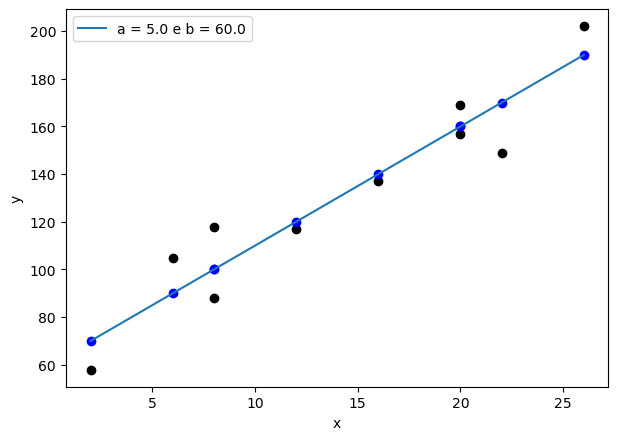

In [6]:
# plot dos dados e da reta ajustada

plt.figure(figsize=(7, 5), dpi = 100)

x = np.arange(min(X), max(X)+1,1).reshape(-1, 1)
plt.plot(x, lr.predict(x), label = 'a = ' + str(lr.coef_[0])+' e b = '+str(lr.intercept_))

plt.scatter(X, Y, c = 'k')
plt.scatter(X, lr.predict(X), color = 'blue')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

### regreesão linear múltipla

In [7]:
# gerar problema de regressão aleatório

from sklearn.datasets import make_regression

X_big, Y_big_real = make_regression(n_samples = 200, n_features = 10, n_informative = 5, noise = 30, tail_strength = 0.3, random_state = 42)

In [8]:
# inicializando e rodando algoritmo

lr_big = LinearRegression()
lr_big.fit(X_big, Y_big_real)

LinearRegression()

In [9]:
# coeficientes da reta

print('Coeficientes: ', lr_big.intercept_, lr_big.coef_)

Coeficientes:  -3.4421611188564416 [ 1.53504458 -1.59908847  7.68307896 80.58345008  1.65002134 36.45262863
  9.99969291 41.01975588  1.56709946 -1.20620528]


In [10]:
# comparação entre real e previsto

Y_big_previsto = lr_big.predict(X_big)

df_big = pd.DataFrame(list(X_big), columns = ['Variável '+str(i) for i in range(len(X_big[0]))])
df_big['Real'] = Y_big_real
df_big['Previsto'] = Y_big_previsto
df_big

,Variável 0,Variável 1,Variável 2,Variável 3,Variável 4,Variável 5,Variável 6,Variável 7,Variável 8,Variável 9,Real,Previsto
0,1.262584,0.932591,-0.399636,0.224685,-1.760809,1.726964,-0.372833,0.722381,-1.525656,-1.418366,81.047593,97.310775
1,-0.295480,-0.370011,-0.109610,-0.088363,1.598647,-0.436386,0.006422,0.546284,0.560919,-0.258796,3.413128,-0.872555
2,-0.692421,-1.320023,0.194607,-0.742471,-0.037037,-0.622649,1.695051,0.043602,-0.429302,-0.611769,-123.438372,-64.684488
3,-1.406661,-0.725744,0.026091,0.517659,-0.755383,-0.624819,-1.279577,-1.840874,-0.611518,0.186767,-76.199271,-76.039565
4,-2.872262,-1.594703,-0.147603,-0.466037,-0.532701,0.323168,-1.768439,0.140886,-1.169917,0.513600,8.419654,-47.446281
...,...,...,...,...,...,...,...,...,...,...,...,...
195,-0.410814,-1.662492,-1.748532,1.304340,1.126705,0.793489,0.810808,-0.134309,-1.090966,1.032546,100.862559,120.687064
196,-0.894607,-0.309172,-0.462275,-0.434496,-0.478749,0.096121,-0.516045,0.938284,1.255756,0.222134,-45.348515,-5.144183
197,-0.576904,0.150394,-0.525755,-0.759133,1.876171,-2.123896,-0.599393,-0.839722,0.950424,0.341756,-214.088367,-183.468780
198,-0.974529,-0.241258,1.109700,0.409819,1.899882,0.634721,0.489187,0.350630,-0.132634,0.672574,85.198420,81.525680


### métricas

In [11]:
# importar MSE, R2 e MAE

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [12]:
# cálculo MAE
print('MAE =', round(mean_absolute_error(Y_big_real, Y_big_previsto), 3))

# MSE
print('MSE =', round(mean_squared_error(Y_big_real, Y_big_previsto), 3))

# RMSE - é a raiz quadrada do MSE, utilizada para maior interpretabilidade da métrica
print('RMSE =', round(np.sqrt(mean_squared_error(Y_big_real, Y_big_previsto)), 3))

# R² - diz qual é o erro com a média e qual é o erro com o modelo. o resultado do R² como % indica que as variáveis independentes explicam x% da variabilidade da variável dependente

print('R2 =', round(r2_score(Y_big_real, Y_big_previsto), 3))

MAE = 21.874
MSE = 763.212
RMSE = 27.626
R2 = 0.923


In [13]:
# cálculo "manual" do R²

round(1 - mean_squared_error(Y_big_real, Y_big_previsto)/mean_squared_error(Y_big_real, [np.mean(Y_big_real)]*Y_big_real.shape[0]), 3)

0.923

### regressão polinomial

In [14]:
# gerar dados da variável independente (X) e da variável dependente (Y)

X = pd.DataFrame([-6, -7.5, -4, -2.3, -2.5, -1, 0, 0.5, 2, 3.45, 6.3, 5, 7.6, 9.5, -8.9, -9.5, -8, -3.5, 3.4, 5.6], columns =['x'])
y = [538.9, -283.8, 337.5, 396.3, 414.8, 394.7, 725.9, 362.2, 505.8, 486.6, 1228.2, 481.3, 1328.3, 2218.9, -872.8, -1151.1, -591.2, 601.6, 651.8, 1361.6]

In [15]:
# inicializando e rodando algoritmo

lr = LinearRegression()
lr.fit(X, y)
y_pred = lr.predict(X)

No handles with labels found to put in legend.


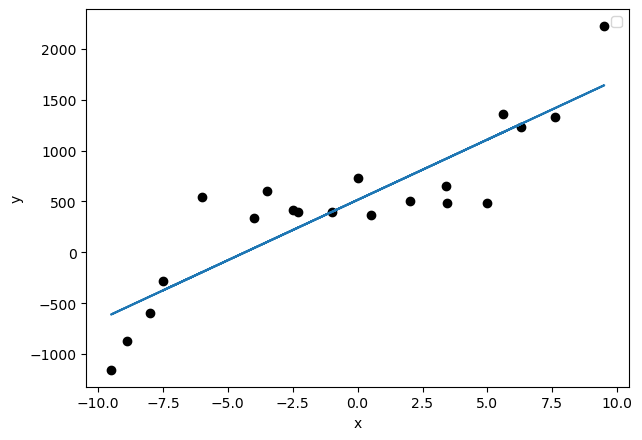

In [16]:
# plot dos dados e da reta ajustada

plt.figure(figsize=(7, 5), dpi = 100)

plt.plot(X, y_pred)

plt.scatter(X.x, y, color = 'black')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

Como o algoritmo sempre tenta encontrar relações lineares entre as variáveis, ele não consegue capturar o padrão mais complexo deste caso específico. Para contornar o problema, criamos novas features de modo que a relação entre a variável resposta e as novas features criadas seja aproximadamente linear. Fazemos isso, normalmente, aumentando o grau do polinômio. É importante ter em mente que, em relação às novas features, **o algoritmo ainda está resolvendo um problema de regressão linear**.

In [17]:
# criação das novas features

Z = pd.DataFrame()
Z['z1'] = X.x
Z['z2'] = X.x**2
Z['z3'] = X.x**3

Z.head()

,z1,z2,z3
0,-6.0,36.00,-216.000
1,-7.5,56.25,-421.875
2,-4.0,16.00,-64.000
3,-2.3,5.29,-12.167
4,-2.5,6.25,-15.625


In [18]:
# inicializando e rodando o algoritmo com as novas features

lr = LinearRegression()
lr.fit(Z, y)
y_pred = lr.predict(Z)

# dados para gerar gráfico

X_graf = np.linspace(-10, 10, num = 100)

Z = pd.DataFrame()
Z['z1'] = X_graf
Z['z2'] = X_graf**2
Z['z3'] = X_graf**3

y_graf = lr.predict(Z)

In [19]:
print('MSE =', round(mean_squared_error(y, y_pred), 3))
print('MAE =', round(mean_absolute_error(y, y_pred), 3))
print('R2 =', round(r2_score(y, y_pred), 3))

MSE = 35501.848
MAE = 145.166
R2 = 0.938


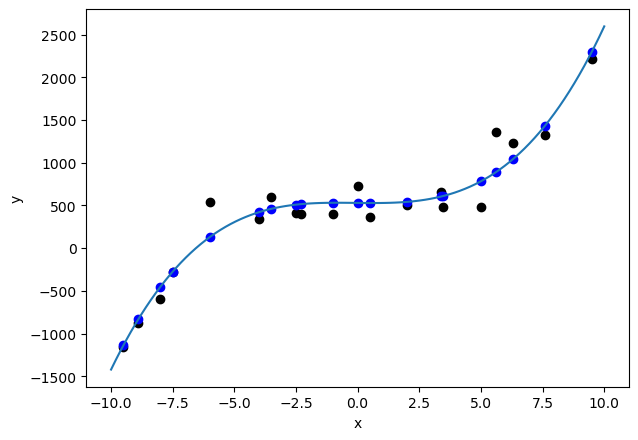

In [20]:
plt.figure(figsize=(7, 5), dpi = 100)

plt.plot(X_graf, y_graf)

plt.scatter(X.x, y, color = 'black')
plt.scatter(X.x, y_pred, color = 'blue')

plt.xlabel('x')
plt.ylabel('y')
plt.show()

Quanto maior o grau, mais sensível aos dados o algoritmo se torna, portanto, aumentando muito o grau do polinômio o algoritmo pode aprender relações mais complexas, mas provavelmente ocorrerá **overfitting**.

### regularização

O obetivo da regularização é reduzir o overfitting adicionando restrições/penalizações na estimação dos parâmetros da regressão. A ideia principal é que diminuir o valor dos coeficientes diminui a influência de algumas variáveis no modelo e assim o modelo se torna mais simples (na prática, isso significa que a regularização diminui a capacidade do modelo de se adpatar aos dados). Assim, a variância é reduzida e o viés aumenta. Existem algumas formas de regularização, mas no geral elas funcionam alterando a função de custo do algoritmo de modo que os parâmetros encontrados não serão somente os que minimizam a função, mas os que minimizam a função (soma dos erros quadráticos, por exemplo) + o fator de penalização. Nas regularizações também há um parâmetro que multiplica a penalização e na prática controla o quanto o modelo será regularizado. Se em um modelo de regressão linear esse parâmetro for igual a 0, por exemplo, a penalidade será multiplicada por 0 e no final a regressão será a mesma do início. 

**Ridge (L2)**: Adiciona um termo de viés que eleva os parâmetros ao quadrado, o que diminuirá a variância (os parâmetros possuem valores menores que 1, então ao elevar ao quadrado o valor do parâmetro diminui). O valor do termo que multiplicará a soma dos parâmetros indicará o grau de penalização do modelo. É importante normalizar as variáveis, pois a depender da escala poderá haver valores maiores ou menores para os coeficientes.

**Lasso (L1)**: Possui a mesma ideia da Ridge mas em vez de, na penalização, elevar os parâmetros ao quadrado, aplica-se um módulo aos parâmetros. Também é utilizada para a eliminação de variáveis. Na regularização Ridge, conforme o valor da penalização aumenta, o valor da inclinação da reta (o parâmetro beta que multiplicará a variável) que minimiza a soma dos erros quadráticos referente a uma variável em específico pode chegar próximo a 0, mas nunca chega a 0 de fato. Na regressão L1 isso ocorre e, se a inclinação chega a zero, a variável não tem poder explicativo e pode ser descartada.

**ElasticNet**: Combina as duas formas de regularização anteriores, aplicando uma penalização ridge (quadrado dos parâmetros) e uma penalização lasso (módulo dos parâmetros).

Normalmente a regularização ridge é utilizada quando se sabe que a maioria das variáveis independentes são relevantes, a Lasso quando se sabe que algumas variáveis independentes são irrelevantes e a elasticnet quando não se sabe (muitas variáveis, por exemplo).

In [21]:
# gerar dados

X = pd.DataFrame([-6, -7.5, -4, -2.3, -2.5, -1, 0, 0.5, 2, 3.45, 6.3, 5, 7.6, 9.5, -8.9, -9.5, -8, -3.5, 3.4, 5.6], columns = ['x'])
y = [528.9, -182.8, 337.5, 396.3, 414.8, 394.7, 725.9, 362.2, 505.8, 486.6, 1228.2, 481.3, 1328.3, 2218.9, -872.8, -1151.1, -591.2, 601.6, 651.8, 1361.6]

X_test = np.array([-6.5, -7.6, -4.4, -2.2, -2.1, -0.5, -0.4, 1.2, 1.6, 4.0, 5.7, 4.8, 7.9, 10.2, -8.8, -9.2, -8.6, -3.9, 3.2, 4.9])
y_test = [294.3, -74.2, 295.8, 159.5, 688.1, 525.5, 508.2, 499.7, 648.7, 847.0, 715.0, 394.2, 1660.5, 2788.1, -1198.6, -1385.3, -719.4, 496.1, 675.3, 614.8]

In [22]:
# transformação polinomial dos dados (alterando grau das features)

from sklearn.preprocessing import PolynomialFeatures

pf = PolynomialFeatures(degree = 10, include_bias = False)

Z =  pf.fit_transform(X)
Z_test = pf.transform(X_test.reshape(-1, 1))

In [23]:
# padronizando dados

from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
Z_esc = sc.fit_transform(Z)
Z_esc_test = sc.transform(Z_test)

### ridge

In [24]:
# inicializando e rodando algoritmo

from sklearn.linear_model import Ridge

rg = Ridge(alpha = 10)
rg.fit(Z_esc, y)
y_pred = rg.predict(Z_esc_test)

In [25]:
print('MSE =', round(mean_squared_error(y_test, y_pred), 3))
print('MAE =', round(mean_absolute_error(y_test, y_pred), 3))
print('R2 =', round(r2_score(y_test, y_pred), 3))

MSE = 428029.954
MAE = 403.513
R2 = 0.437


In [26]:
print((rg.coef_**2).sum())
rg.coef_

217251.96832505288


array([270.50616953, -31.93751263, 218.88338213, -42.18439296,
       189.52867484, -38.30109251, 171.23616382, -30.06406594,
       159.06326127, -21.30804203])

### lasso

In [27]:
# inicializando e rodando algoritmo

from sklearn.linear_model import Lasso

ls = Lasso(alpha = 20)
ls.fit(Z_esc, y)
y_pred = ls.predict(Z_esc_test)

In [28]:
print('MSE =', round(mean_squared_error(y_test, y_pred), 3))
print('MAE =', round(mean_absolute_error(y_test, y_pred), 3))
print('R2 =', round(r2_score(y_test, y_pred), 3))

MSE = 77040.064
MAE = 215.744
R2 = 0.899


In [29]:
print(np.abs(ls.coef_).sum())
ls.coef_

2878.6036000982785


array([ 276.18656302,   -0.        , 2602.41703708,   -0.        ,
          0.        ,   -0.        ,    0.        ,   -0.        ,
          0.        ,   -0.        ])

### elasticnet

In [30]:
# inicializando e rodando algoritmo

from sklearn.linear_model import ElasticNet

# l1_ratio indica o quanto da penalização se deve ao Lasso
en = ElasticNet(alpha = 0.001, l1_ratio = 0.3)
en.fit(Z_esc, y)
y_pred = en.predict(Z_esc_test)

In [31]:
print('MSE =', round(mean_squared_error(y_test, y_pred), 3))
print('MAE =', round(mean_absolute_error(y_test, y_pred), 3))
print('R2 =', round(r2_score(y_test, y_pred), 3))

MSE = 43861.477
MAE = 169.829
R2 = 0.942
